## ROP PREDICTION USING ML TECHNIQUES

**Outline of Analysis**

* Stage 1: Get data and clean-up 
* Stage 2: Explore data and interpret insights 
* Stage 3: Conduct Correlation analysis (Pearson's Corr technique)
* Stage 4: Feature Selection and Data Preparation
* Stage 5: Split data, train, test and validation OR Try cross validation technique
* Stage 6: Model Building and Evaluation
* Stage 7: Conclusion and Recommendation

In [1]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Stage 1: Get data and clean-up

In [2]:
# load data 
train_df = pd.read_csv('BottomHole1440325201Depth.csv') # Top Hole data


train_df.head()

,Hole Depth,Rate Of Penetration,Bit Depth,Time Of Penetration,Hook Load,Standpipe Pressure,Rotary RPM,Rotary Torque,Weight on Bit,On Bottom ROP,...,Sensor Depth,Convertible Torque,Pason Gas Unlagged,TTS Mechanical Specific Energy,P1 Rate,P2 Rate,PVT Monitor Mud Gain/Loss,PVT Mud G/L Threshold,Flow 1 Gain/Loss,Flow 1 G/L Threshold
0,1,0.32,1,187.35,43.6,0,0,0.033,111.6,0.32,...,13806.99,0.033,-999.25,0.00,0.0,0.0,-37.8,100,-999.25,14
1,2,0.00,2,-999.25,39.4,0,0,0.029,0.0,0.00,...,13806.99,0.029,-999.25,-999.25,0.0,0.0,-37.8,100,-999.25,14
2,3,0.00,3,-999.25,39.3,0,0,0.029,0.0,0.00,...,13806.99,0.029,-999.25,-999.25,0.0,0.0,-37.8,100,-999.25,14
3,4,0.00,4,-999.25,39.2,0,0,0.029,112.0,0.00,...,13806.99,0.029,-999.25,-999.25,0.0,0.0,-37.8,100,-999.25,14
4,5,0.00,5,-999.25,39.3,0,0,0.029,111.9,0.00,...,13806.99,0.029,-999.25,-999.25,0.0,0.0,-37.8,100,-999.25,14


In [3]:
for coln in train_df.columns:
        train_df.loc[train_df[coln] < 0, coln] = np.nan

In [4]:
train_df.tail()

,Hole Depth,Rate Of Penetration,Bit Depth,Time Of Penetration,Hook Load,Standpipe Pressure,Rotary RPM,Rotary Torque,Weight on Bit,On Bottom ROP,...,Sensor Depth,Convertible Torque,Pason Gas Unlagged,TTS Mechanical Specific Energy,P1 Rate,P2 Rate,PVT Monitor Mud Gain/Loss,PVT Mud G/L Threshold,Flow 1 Gain/Loss,Flow 1 G/L Threshold
9086,13875.0,81.93,13875.0,0.73,136.3,0.0,0.0,0.044,0.0,81.93,...,13835.99,0.044,10.51,0.0,0.0,0.0,6.5,20.0,NaN,15.0
9087,13876.0,230.37,13876.0,0.26,135.8,0.0,0.0,0.044,0.0,230.37,...,13835.99,0.044,10.78,0.0,0.0,0.0,6.6,20.0,NaN,15.0
9088,13877.0,285.93,13877.0,0.21,136.1,0.0,0.0,0.044,0.0,285.93,...,13835.99,0.044,10.97,0.0,0.0,0.0,6.9,20.0,NaN,15.0
9089,13878.0,358.26,13878.0,0.17,136.2,0.0,0.0,0.044,0.0,358.26,...,13835.99,0.044,11.11,0.0,0.0,0.0,6.6,20.0,NaN,15.0
9090,13879.0,384.40,13879.0,0.16,135.8,0.0,0.0,0.044,0.0,384.40,...,13835.99,0.044,11.23,0.0,0.0,0.0,5.7,20.0,NaN,15.0


In [5]:
train_df.isnull().sum()

Hole Depth                           0
Rate Of Penetration                  0
Bit Depth                            0
Time Of Penetration                 28
Hook Load                            0
Standpipe Pressure                   0
Rotary RPM                           0
Rotary Torque                        0
Weight on Bit                        0
On Bottom ROP                       20
Total Mud Volume                     0
Line Wear                            0
Block Height                         0
On Bottom Hours                      0
Circulating Hours                    0
Tool Face                         7879
Inclination                          0
Azimuth                              0
Gamma                             8660
Downhole Pressure 1               8489
Over Pull                            0
Fill Strokes                         0
Surface Stick Slip Index          2716
Pump Total Strokes Rate              0
Bit RPM                              0
dexponent                

**Drop Columns with > 70% of missing values**

In [6]:
train_df = train_df.drop(['Tool Face', 'Gamma', 'Downhole Pressure 1', 'PVT Total Mud Gain/Loss', 
                          'PVT Monitor Mud Gain/Loss', 'Surface Stick Slip Index', 'Gamma at Bit', 
                          'GA Trap Motor Current', 'GA Trap Motor Temp', 'GA Heat Trace Temp', 
                          'GA Trap Connector Temp', 'GA Conn Heater Duty Cycle', 'GA Blk Heater Duty Cycle',
                          'Pason Gas Unlagged', 'TTS Mechanical Specific Energy', 'Flow 1 Gain/Loss'], axis=1)

In [7]:
train_df.isnull().sum()

Hole Depth                      0
Rate Of Penetration             0
Bit Depth                       0
Time Of Penetration            28
Hook Load                       0
Standpipe Pressure              0
Rotary RPM                      0
Rotary Torque                   0
Weight on Bit                   0
On Bottom ROP                  20
Total Mud Volume                0
Line Wear                       0
Block Height                    0
On Bottom Hours                 0
Circulating Hours               0
Inclination                     0
Azimuth                         0
Over Pull                       0
Fill Strokes                    0
Pump Total Strokes Rate         0
Bit RPM                         0
dexponent                     368
EDR Instantaneous ROP           0
Differential Pressure         445
Trip Speed                      0
Mechanical Specific Energy    177
Motor RPM                       0
Relative MSE                  196
Sensor Depth                    0
Convertible To

In [8]:
train_df.shape

(9091, 34)

In [9]:
train_df = train_df.dropna(axis=0)

In [10]:
train_df.shape

(8313, 34)

In [11]:
train_df.describe()

,Hole Depth,Rate Of Penetration,Bit Depth,Time Of Penetration,Hook Load,Standpipe Pressure,Rotary RPM,Rotary Torque,Weight on Bit,On Bottom ROP,...,Trip Speed,Mechanical Specific Energy,Motor RPM,Relative MSE,Sensor Depth,Convertible Torque,P1 Rate,P2 Rate,PVT Mud G/L Threshold,Flow 1 G/L Threshold
count,8313.000000,8313.000000,8313.000000,8313.000000,8313.000000,8313.000000,8313.000000,8313.000000,8313.000000,8313.000000,...,8313.000000,8313.000000,8313.000000,8313.000000,8313.000000,8313.000000,8313.000000,8313.000000,8313.000000,8313.000000
mean,9780.366414,169.511136,9780.366414,0.619242,130.286058,3293.153374,75.704559,11.480612,24.513774,169.511136,...,3.276026,179.837832,128.162637,1112.100565,11082.564865,11.480775,225.487427,231.335600,16.192710,10.851197
std,2279.886475,73.083066,2279.886475,1.164287,11.738271,617.332251,35.156091,3.823322,7.940194,73.083066,...,1.227059,1925.468754,8.292840,8267.810361,9793.923837,3.823466,28.990801,15.397346,22.668467,2.196466
min,6082.000000,2.760000,6082.000000,0.210000,103.800000,213.000000,1.000000,2.202000,0.000000,2.760000,...,0.800000,0.000000,40.000000,94.000000,6354.990000,2.202000,0.000000,0.000000,10.000000,10.000000
25%,7587.000000,100.690000,7587.000000,0.260000,122.700000,3015.000000,49.000000,8.620000,19.100000,100.690000,...,2.400000,88.400000,129.000000,587.000000,7871.000000,8.620000,228.400000,231.190000,10.000000,10.000000
50%,9677.000000,199.360000,9677.000000,0.300000,126.600000,3391.000000,100.000000,11.860000,27.500000,199.360000,...,4.000000,99.900000,129.000000,689.000000,9954.000000,11.860000,228.400000,231.190000,10.000000,10.000000
75%,11772.000000,228.380000,11772.000000,0.600000,134.500000,3704.000000,100.000000,14.674000,30.000000,228.380000,...,4.000000,124.400000,129.000000,816.000000,12224.020000,14.674000,228.400000,231.190000,10.000000,10.000000
max,13874.000000,291.980000,13874.000000,21.710000,169.400000,4180.000000,121.000000,19.020000,42.600000,291.980000,...,5.600000,130656.000000,149.000000,376527.000000,100000.000000,19.020000,386.400000,289.810000,100.000000,30.000000


### Stage 2: Explore data and interpret insights

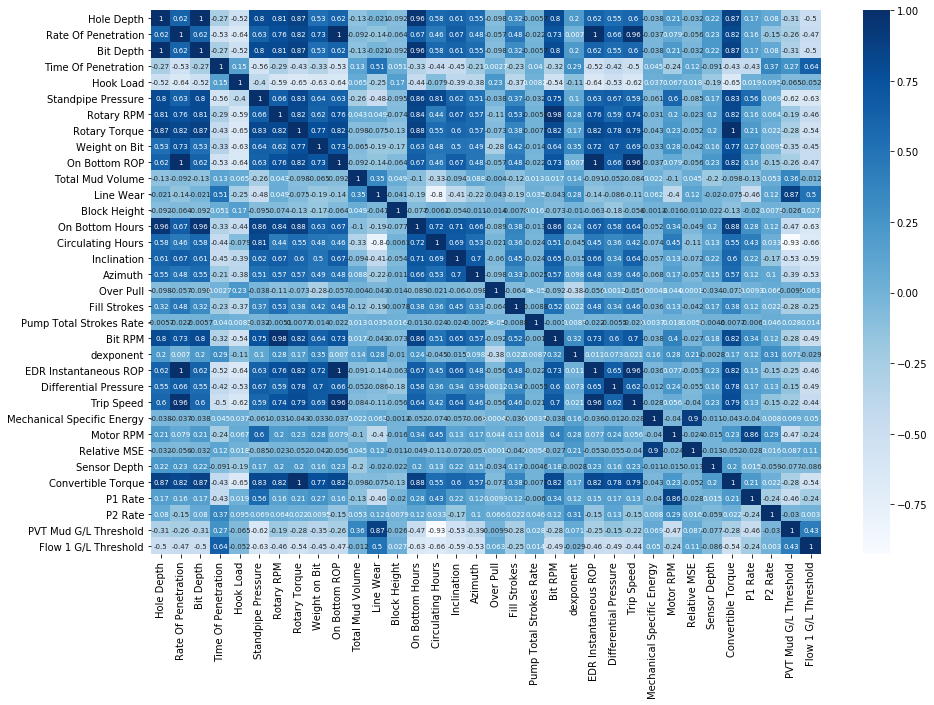

In [12]:
# make a correlation plot (heatmap)
corr_mx = train_df.corr()
f, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_mx, annot=True, annot_kws={'size':7}, cmap='Blues')

**Features for r2 >= +- 0.4 to be selected**

In [13]:
train_df = pd.DataFrame(train_df, columns = ['Hole Depth', 'Rate Of Penetration', 'Bit Depth', 'Time Of Penetration', 
                                             'Hook Load', 'Standpipe Pressure', 'Rotary RPM', 'Rotary Torque','Weight on Bit', 
                                             'On Bottom ROP', 'On Bottom Hours', 'Circulating Hours', 'Inclination',
                                             'Azimuth', 'Fill Strokes', 'Bit RPM', 'EDR Instantaneous ROP', 
                                             'Differential Pressure','Trip Speed', 'Convertible Torque', 
                                             'Flow 1 G/L Threshold'])

In [14]:
well_df = train_df

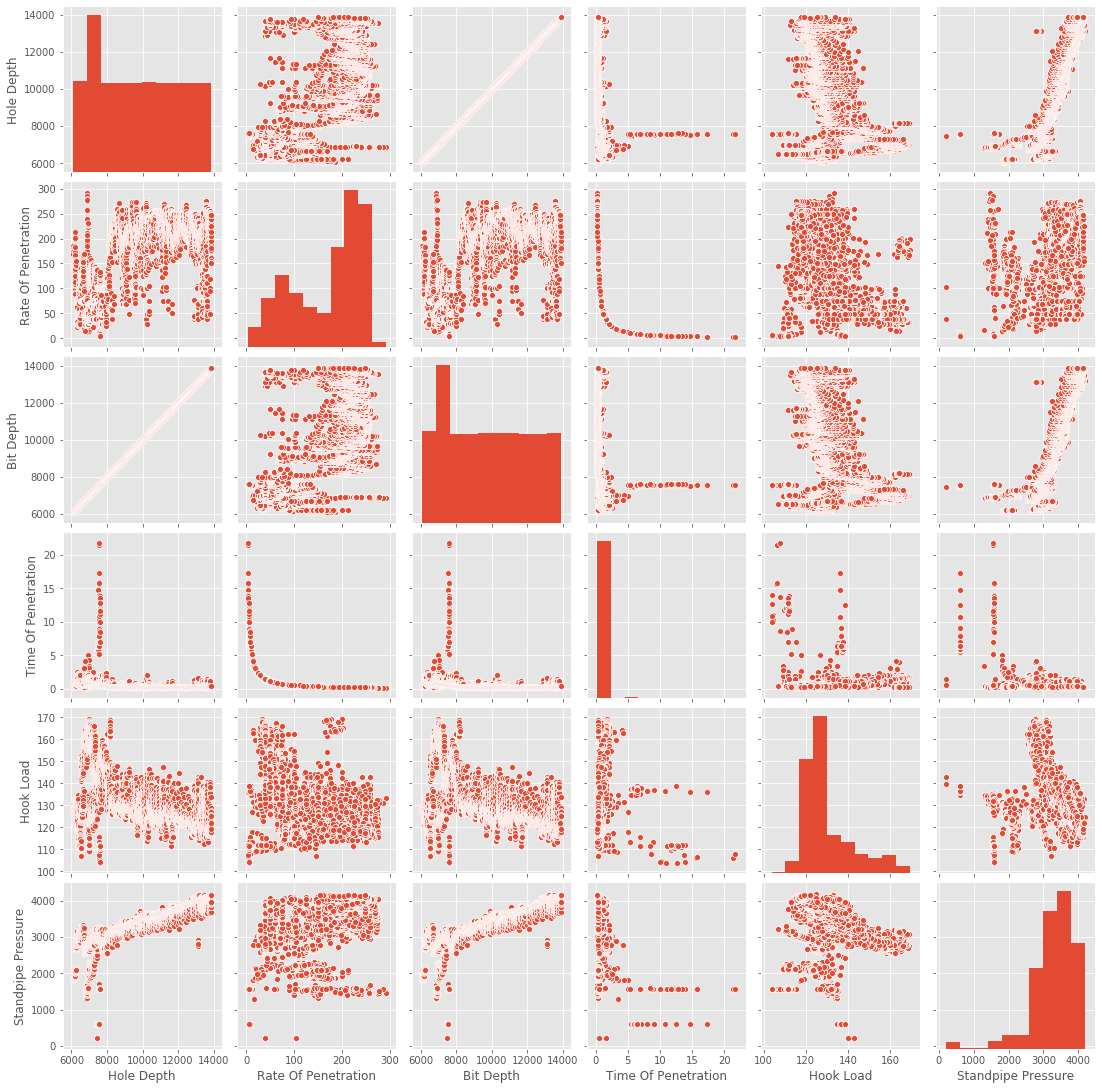

In [15]:
plt.style.use('ggplot')
sns.pairplot(well_df, vars = ['Hole Depth', 'Rate Of Penetration', 'Bit Depth', 'Time Of Penetration', 
                              'Hook Load', 'Standpipe Pressure']) 

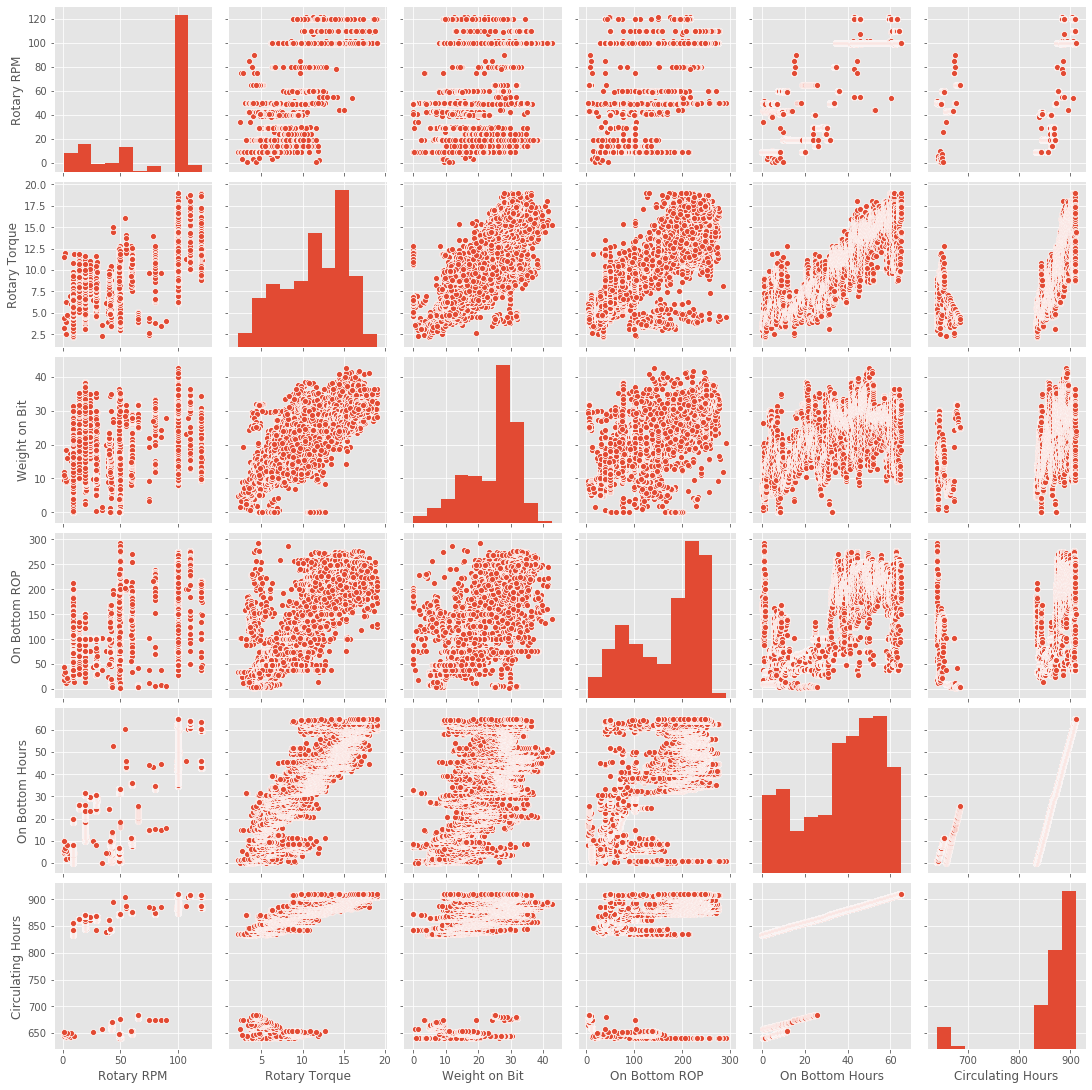

In [16]:
plt.style.use('ggplot')
sns.pairplot(well_df, vars = ['Rotary RPM', 'Rotary Torque','Weight on Bit', 
                                             'On Bottom ROP', 'On Bottom Hours', 'Circulating Hours']) 

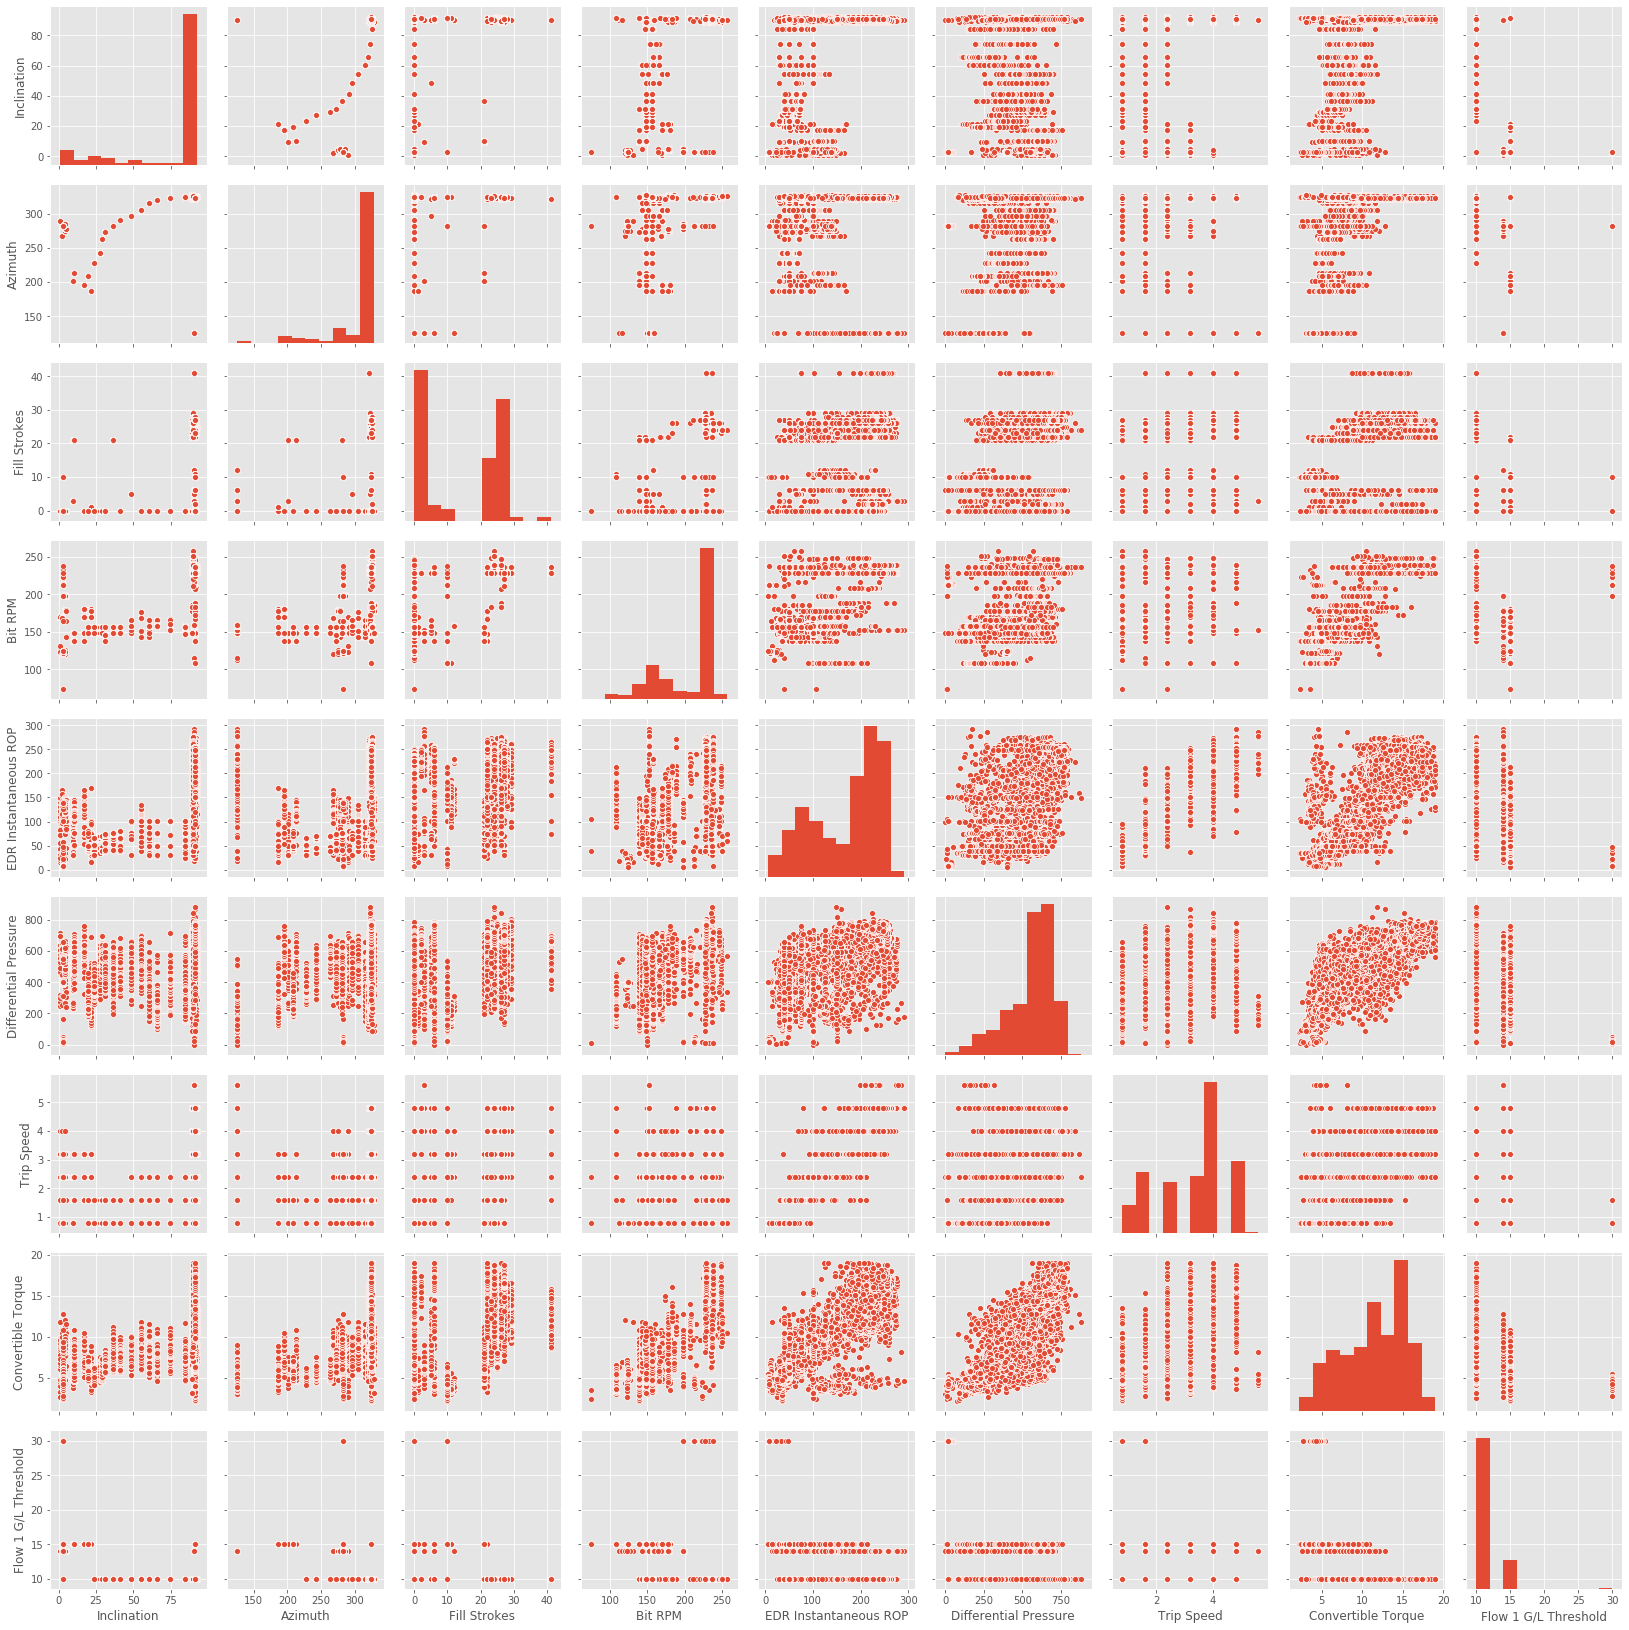

In [17]:
plt.style.use('ggplot')
sns.pairplot(well_df, vars = ['Inclination', 'Azimuth', 'Fill Strokes', 'Bit RPM', 'EDR Instantaneous ROP', 
                                             'Differential Pressure','Trip Speed', 'Convertible Torque', 
                                             'Flow 1 G/L Threshold']) 

**Observations**
* There are some regular signals of increase and decrease with all parameters w.r.t depth (individual plots will explain better)
* There are possible outliers which can be observed from the plot
* There are suspected collinear columns which include:
 * Hole Depth vs Bit Depth
 * Rotary Torque vs Convertible Torque
 * On Bottom ROP vs EDR Instantaneous ROP

**Further Visualizations:**
This will help in identifying mor useful insights from the data 

In [18]:
def log_plot1(logs):
    from matplotlib.patches import Patch
    logs = logs.sort_values(by='Hole Depth')
    top = logs['Hole Depth'].min()
    bot = logs['Hole Depth'].max()
    
    f, ax = plt.subplots(nrows=1, ncols=7, figsize=(15, 10))
    ax[0].plot(logs['Rate Of Penetration'], logs['Hole Depth'], color='green')
    ax[1].plot(logs['Bit Depth'], logs['Hole Depth'], color='brown')
    ax[2].plot(logs['Time Of Penetration'], logs['Hole Depth'], color='black')
    ax[3].plot(logs['Hook Load'], logs['Hole Depth'], color='blue')
    ax[4].plot(logs['Standpipe Pressure'], logs['Hole Depth'], color='purple')
    ax[5].plot(logs['Rotary RPM'], logs['Hole Depth'], color='red')
    ax[6].plot(logs['Rotary Torque'], logs['Hole Depth'], color='violet')
    
    
    for i in range(len(ax)):
        ax[i].set_ylim(top,bot)
        ax[i].invert_yaxis()
        ax[i].grid()
        
    ax[0].set_xlabel("ROP", fontsize = 10)
    ax[0].set_xlim(logs['Rate Of Penetration'].min(), logs['Rate Of Penetration'].max())
    ax[0].set_ylabel("Hole Depth",fontsize = 16)
    ax[1].set_xlabel("Bit Depth", fontsize = 10)
    ax[1].set_xlim(logs['Bit Depth'].min(), logs['Bit Depth'].max())
    ax[2].set_xlabel("Time_Of_Penetration", fontsize = 10)
    ax[2].set_xlim(logs['Time Of Penetration'].min(),logs['Time Of Penetration'].max())
    ax[3].set_xlabel("Hook Load", fontsize = 10)
    ax[3].set_xlim(logs['Hook Load'].min(), logs['Hook Load'].max())
    ax[4].set_xlabel("Standpipe_Pressure", fontsize = 10)
    ax[4].set_xlim(logs['Standpipe Pressure'].min(), logs['Standpipe Pressure'].max())
    ax[5].set_xlabel("Rotary RPM'", fontsize = 10)
    ax[5].set_xlim(logs['Rotary RPM'].min(), logs['Rotary RPM'].max())
    ax[6].set_xlabel("Rotary Torque", fontsize = 10)
    ax[6].set_xlim(logs['Rotary Torque'].min(), logs['Rotary Torque'].max())

    
    f.suptitle('MIP3H_Drilling_Rig_Data', fontsize=20,y=0.94)

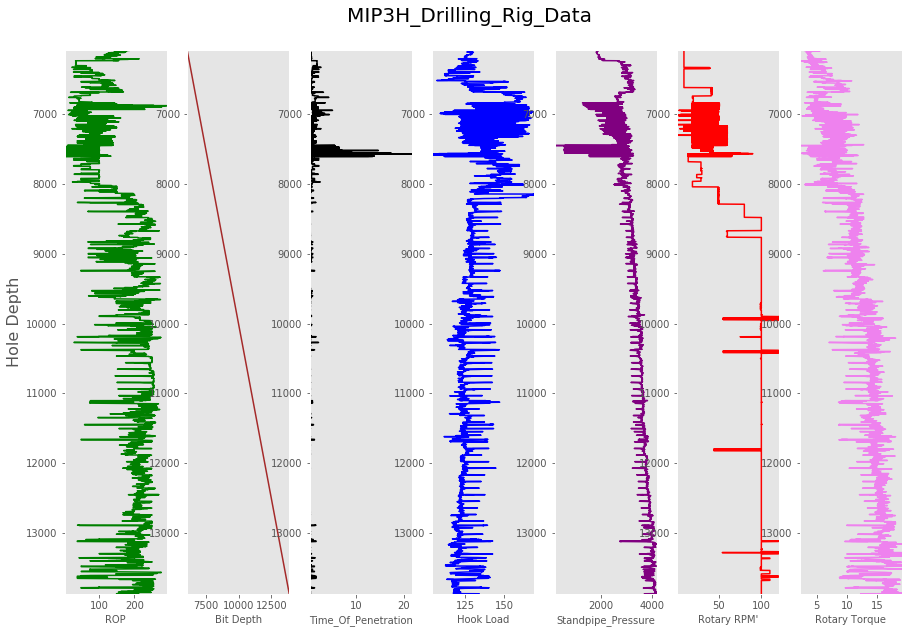

In [19]:
log_plot1(well_df)

In [20]:
def log_plot1(logs):
    from matplotlib.patches import Patch
    logs = logs.sort_values(by='Hole Depth')
    top = logs['Hole Depth'].min()
    bot = logs['Hole Depth'].max()
    
    f, ax = plt.subplots(nrows=1, ncols=7, figsize=(15, 10))
    ax[0].plot(logs['Weight on Bit'], logs['Hole Depth'], color='green')
    ax[1].plot(logs['On Bottom ROP'], logs['Hole Depth'], color='brown')
    ax[2].plot(logs['On Bottom Hours'], logs['Hole Depth'], color='black')
    ax[3].plot(logs['Circulating Hours'], logs['Hole Depth'], color='blue')
    ax[4].plot(logs['Inclination'], logs['Hole Depth'], color='purple')
    ax[5].plot(logs['Azimuth'], logs['Hole Depth'], color='red')
    ax[6].plot(logs['Fill Strokes'], logs['Hole Depth'], color='violet')
    
    
    for i in range(len(ax)):
        ax[i].set_ylim(top,bot)
        ax[i].invert_yaxis()
        ax[i].grid()
        
    ax[0].set_xlabel("WOB", fontsize = 10)
    ax[0].set_xlim(logs['Weight on Bit'].min(), logs['Weight on Bit'].max())
    ax[0].set_ylabel("Hole Depth",fontsize = 16)
    ax[1].set_xlabel("On Bottom ROP", fontsize = 10)
    ax[1].set_xlim(logs['On Bottom ROP'].min(), logs['On Bottom ROP'].max())
    ax[2].set_xlabel("On_Bottom_Hours", fontsize = 10)
    ax[2].set_xlim(logs['On Bottom Hours'].min(),logs['On Bottom Hours'].max())
    ax[3].set_xlabel("Circulating Hours", fontsize = 10)
    ax[3].set_xlim(logs['Circulating Hours'].min(), logs['Circulating Hours'].max())
    ax[4].set_xlabel("Inclination", fontsize = 10)
    ax[4].set_xlim(logs['Inclination'].min(), logs['Inclination'].max())
    ax[5].set_xlabel("Azimuth", fontsize = 10)
    ax[5].set_xlim(logs['Azimuth'].min(), logs['Azimuth'].max())
    ax[6].set_xlabel("Fill Strokes", fontsize = 10)
    ax[6].set_xlim(logs['Fill Strokes'].min(), logs['Fill Strokes'].max())

    
    f.suptitle('MIP3H_Drilling_Rig_Data', fontsize=20,y=0.94)

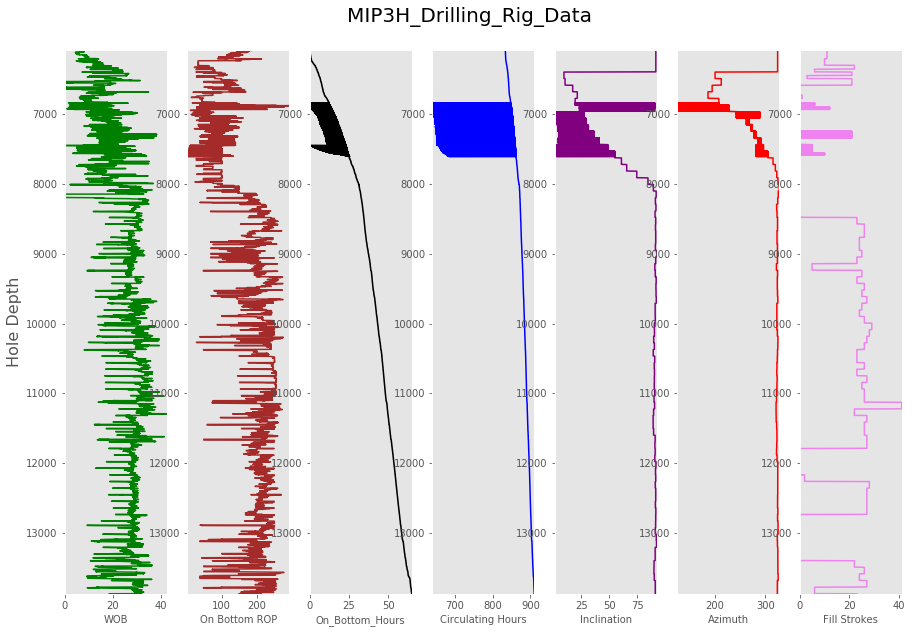

In [21]:
log_plot1(well_df)

In [22]:
well_df.columns

Index(['Hole Depth', 'Rate Of Penetration', 'Bit Depth', 'Time Of Penetration',
       'Hook Load', 'Standpipe Pressure', 'Rotary RPM', 'Rotary Torque',
       'Weight on Bit', 'On Bottom ROP', 'On Bottom Hours',
       'Circulating Hours', 'Inclination', 'Azimuth', 'Fill Strokes',
       'Bit RPM', 'EDR Instantaneous ROP', 'Differential Pressure',
       'Trip Speed', 'Convertible Torque', 'Flow 1 G/L Threshold'],
      dtype='object')

In [23]:
def log_plot1(logs):
    from matplotlib.patches import Patch
    logs = logs.sort_values(by='Hole Depth')
    top = logs['Hole Depth'].min()
    bot = logs['Hole Depth'].max()
    
    f, ax = plt.subplots(nrows=1, ncols=6, figsize=(15, 10))
    ax[0].plot(logs['Bit RPM'], logs['Hole Depth'], color='green')
    ax[1].plot(logs['EDR Instantaneous ROP'], logs['Hole Depth'], color='brown')
    ax[2].plot(logs['Differential Pressure'], logs['Hole Depth'], color='black')
    ax[3].plot(logs['Trip Speed'], logs['Hole Depth'], color='blue')
    ax[4].plot(logs['Convertible Torque'], logs['Hole Depth'], color='purple')
    ax[5].plot(logs['Flow 1 G/L Threshold'], logs['Hole Depth'], color='red')
    
    
    
    for i in range(len(ax)):
        ax[i].set_ylim(top,bot)
        ax[i].invert_yaxis()
        ax[i].grid()
        
    ax[0].set_xlabel("Bit RPM", fontsize = 10)
    ax[0].set_xlim(logs['Bit RPM'].min(), logs['Bit RPM'].max())
    ax[0].set_ylabel("Hole Depth",fontsize = 16)
    ax[1].set_xlabel("EDR_Instantaneous_ROP", fontsize = 10)
    ax[1].set_xlim(logs['EDR Instantaneous ROP'].min(), logs['EDR Instantaneous ROP'].max())
    ax[2].set_xlabel("Differential Pressure", fontsize = 10)
    ax[2].set_xlim(logs['Differential Pressure'].min(),logs['Differential Pressure'].max())
    ax[3].set_xlabel("Trip Speed", fontsize = 10)
    ax[3].set_xlim(logs['Trip Speed'].min(), logs['Trip Speed'].max())
    ax[4].set_xlabel("Convertible Torque", fontsize = 10)
    ax[4].set_xlim(logs['Convertible Torque'].min(), logs['Convertible Torque'].max())
    ax[5].set_xlabel("Flow 1 G/L Threshold", fontsize = 10)
    ax[5].set_xlim(logs['Flow 1 G/L Threshold'].min(), logs['Flow 1 G/L Threshold'].max())
    

    
    f.suptitle('MIP3H_Drilling_Rig_Data', fontsize=20,y=0.94)

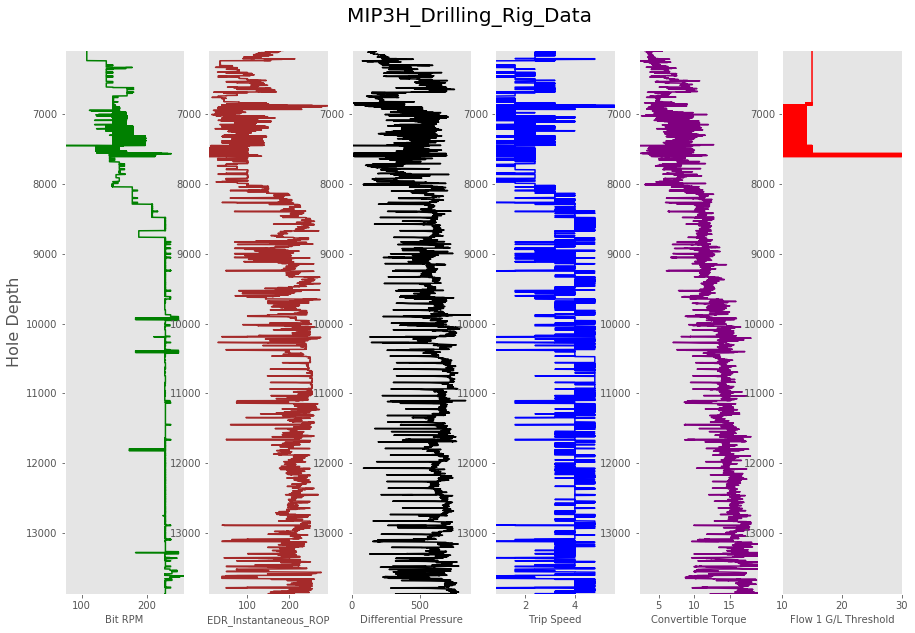

In [24]:
log_plot1(well_df)

In [25]:
well_df.describe()

,Hole Depth,Rate Of Penetration,Bit Depth,Time Of Penetration,Hook Load,Standpipe Pressure,Rotary RPM,Rotary Torque,Weight on Bit,On Bottom ROP,...,Circulating Hours,Inclination,Azimuth,Fill Strokes,Bit RPM,EDR Instantaneous ROP,Differential Pressure,Trip Speed,Convertible Torque,Flow 1 G/L Threshold
count,8313.000000,8313.000000,8313.000000,8313.000000,8313.000000,8313.000000,8313.000000,8313.000000,8313.000000,8313.000000,...,8313.000000,8313.000000,8313.000000,8313.000000,8313.000000,8313.000000,8313.000000,8313.000000,8313.000000,8313.000000
mean,9780.366414,169.511136,9780.366414,0.619242,130.286058,3293.153374,75.704559,11.480612,24.513774,169.511136,...,863.653519,75.313738,307.275051,13.927102,203.563695,169.775579,555.134633,3.276026,11.480775,10.851197
std,2279.886475,73.083066,2279.886475,1.164287,11.738271,617.332251,35.156091,3.823322,7.940194,73.083066,...,62.881207,29.218991,38.083003,12.479144,37.560622,72.689412,149.760615,1.227059,3.823466,2.196466
min,6082.000000,2.760000,6082.000000,0.210000,103.800000,213.000000,1.000000,2.202000,0.000000,2.760000,...,640.000000,1.100000,125.820000,0.000000,74.000000,6.405000,0.000000,0.800000,2.202000,10.000000
25%,7587.000000,100.690000,7587.000000,0.260000,122.700000,3015.000000,49.000000,8.620000,19.100000,100.690000,...,861.600000,84.400000,321.450000,0.000000,169.000000,100.719000,487.200000,2.400000,8.620000,10.000000
50%,9677.000000,199.360000,9677.000000,0.300000,126.600000,3391.000000,100.000000,11.860000,27.500000,199.360000,...,882.400000,90.400000,323.350000,21.000000,228.000000,199.364000,596.300000,4.000000,11.860000,10.000000
75%,11772.000000,228.380000,11772.000000,0.600000,134.500000,3704.000000,100.000000,14.674000,30.000000,228.380000,...,895.300000,91.200000,324.520000,26.000000,229.000000,228.436000,663.300000,4.000000,14.674000,10.000000
max,13874.000000,291.980000,13874.000000,21.710000,169.400000,4180.000000,121.000000,19.020000,42.600000,291.980000,...,910.100000,92.200000,327.680000,41.000000,258.000000,291.976000,881.300000,5.600000,19.020000,30.000000


### Stage 3: Conduct Correlation analysis (Pearson's Corr technique)

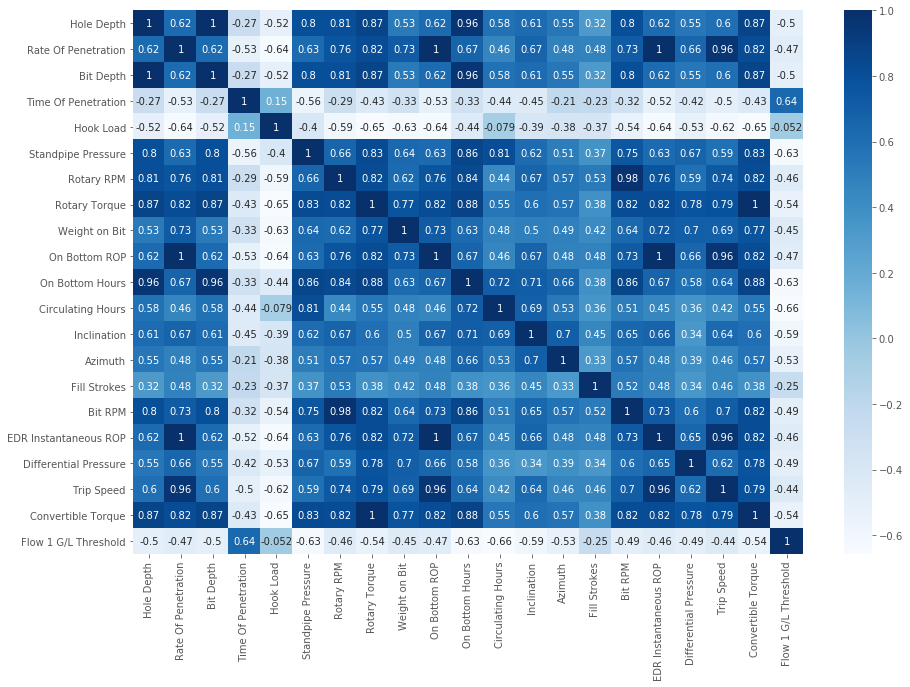

In [26]:
# make a correlation plot (heatmap)
corr_mx = well_df.corr()
f, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_mx, annot=True, annot_kws={'size':10}, cmap='Blues')

In [27]:
well_df.columns

Index(['Hole Depth', 'Rate Of Penetration', 'Bit Depth', 'Time Of Penetration',
       'Hook Load', 'Standpipe Pressure', 'Rotary RPM', 'Rotary Torque',
       'Weight on Bit', 'On Bottom ROP', 'On Bottom Hours',
       'Circulating Hours', 'Inclination', 'Azimuth', 'Fill Strokes',
       'Bit RPM', 'EDR Instantaneous ROP', 'Differential Pressure',
       'Trip Speed', 'Convertible Torque', 'Flow 1 G/L Threshold'],
      dtype='object')

### Stage 4: Feature Selection and Data Preparation

In [28]:
well_df.shape

(8313, 21)

**Observation**

We eliminate few columns so as to handle collinearity

* Hole Depth vs Bit Depth
* Rotary Torque vs Convertible Torque
* On Bottom ROP vs EDR Instantaneous ROP

In [29]:
well_df = well_df.drop(['Hole Depth', 'Convertible Torque', 'EDR Instantaneous ROP'], axis=1)

In [30]:
well_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8313 entries, 188 to 9085
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rate Of Penetration    8313 non-null   float64
 1   Bit Depth              8313 non-null   float64
 2   Time Of Penetration    8313 non-null   float64
 3   Hook Load              8313 non-null   float64
 4   Standpipe Pressure     8313 non-null   float64
 5   Rotary RPM             8313 non-null   float64
 6   Rotary Torque          8313 non-null   float64
 7   Weight on Bit          8313 non-null   float64
 8   On Bottom ROP          8313 non-null   float64
 9   On Bottom Hours        8313 non-null   float64
 10  Circulating Hours      8313 non-null   float64
 11  Inclination            8313 non-null   float64
 12  Azimuth                8313 non-null   float64
 13  Fill Strokes           8313 non-null   float64
 14  Bit RPM                8313 non-null   float64
 15  Di

In [31]:
well_df.columns

Index(['Rate Of Penetration', 'Bit Depth', 'Time Of Penetration', 'Hook Load',
       'Standpipe Pressure', 'Rotary RPM', 'Rotary Torque', 'Weight on Bit',
       'On Bottom ROP', 'On Bottom Hours', 'Circulating Hours', 'Inclination',
       'Azimuth', 'Fill Strokes', 'Bit RPM', 'Differential Pressure',
       'Trip Speed', 'Flow 1 G/L Threshold'],
      dtype='object')

In [32]:
# Define the required data for standardscaler
df_sd = well_df.iloc[:, 1:]
df_sd.head()

,Bit Depth,Time Of Penetration,Hook Load,Standpipe Pressure,Rotary RPM,Rotary Torque,Weight on Bit,On Bottom ROP,On Bottom Hours,Circulating Hours,Inclination,Azimuth,Fill Strokes,Bit RPM,Differential Pressure,Trip Speed,Flow 1 G/L Threshold
188,6835.0,3.49,134.9,1294.0,50.0,3.038,1.6,17.19,0.3,640.0,90.3,125.82,6.0,149.0,0.0,2.4,14.0
189,6836.0,0.61,133.3,1406.0,50.0,3.671,6.8,98.44,0.3,640.0,90.3,125.82,6.0,149.0,111.6,2.4,14.0
190,6837.0,0.60,130.5,1416.0,50.0,3.697,7.6,100.18,0.3,640.0,90.3,125.82,6.0,149.0,121.4,2.4,14.0
191,6838.0,0.60,129.5,1513.0,50.0,3.633,14.9,99.41,0.3,640.1,90.3,125.82,6.0,149.0,218.7,2.4,14.0
192,6839.0,0.43,132.6,1411.0,50.0,3.442,9.4,140.77,0.3,640.1,90.3,125.82,6.0,149.0,116.2,3.2,14.0


In [33]:
from sklearn.preprocessing import StandardScaler

s_scaler = StandardScaler()
df_s = s_scaler.fit_transform(df_sd)

df_s = pd.DataFrame(df_s, columns=df_sd.columns)
df_s.head()

,Bit Depth,Time Of Penetration,Hook Load,Standpipe Pressure,Rotary RPM,Rotary Torque,Weight on Bit,On Bottom ROP,On Bottom Hours,Circulating Hours,Inclination,Azimuth,Fill Strokes,Bit RPM,Differential Pressure,Trip Speed,Flow 1 G/L Threshold
0,-1.291969,2.465828,0.393092,-3.238570,-0.731199,-2.208320,-2.885969,-2.084345,-2.053802,-3.556976,0.512925,-4.765012,-0.635266,-1.452771,-3.707036,-0.713966,1.433663
1,-1.291531,-0.007939,0.256777,-3.057133,-0.731199,-2.042747,-2.231033,-0.972529,-2.053802,-3.556976,0.512925,-4.765012,-0.635266,-1.452771,-2.961802,-0.713966,1.433663
2,-1.291092,-0.016528,0.018227,-3.040933,-0.731199,-2.035947,-2.130274,-0.948719,-2.053802,-3.556976,0.512925,-4.765012,-0.635266,-1.452771,-2.896360,-0.713966,1.433663
3,-1.290653,-0.016528,-0.066969,-2.883796,-0.731199,-2.052687,-1.210846,-0.959256,-2.053802,-3.555386,0.512925,-4.765012,-0.635266,-1.452771,-2.246618,-0.713966,1.433663
4,-1.290215,-0.162549,0.197140,-3.049033,-0.731199,-2.102647,-1.903566,-0.393290,-2.053802,-3.555386,0.512925,-4.765012,-0.635266,-1.452771,-2.931085,-0.061961,1.433663


In [34]:
#df_s.shape

In [35]:
y = well_df.iloc[:, 0:-17]

y.head()

,Rate Of Penetration
188,17.19
189,98.44
190,100.18
191,99.41
192,140.77


In [36]:
X = df_s
X.head()

,Bit Depth,Time Of Penetration,Hook Load,Standpipe Pressure,Rotary RPM,Rotary Torque,Weight on Bit,On Bottom ROP,On Bottom Hours,Circulating Hours,Inclination,Azimuth,Fill Strokes,Bit RPM,Differential Pressure,Trip Speed,Flow 1 G/L Threshold
0,-1.291969,2.465828,0.393092,-3.238570,-0.731199,-2.208320,-2.885969,-2.084345,-2.053802,-3.556976,0.512925,-4.765012,-0.635266,-1.452771,-3.707036,-0.713966,1.433663
1,-1.291531,-0.007939,0.256777,-3.057133,-0.731199,-2.042747,-2.231033,-0.972529,-2.053802,-3.556976,0.512925,-4.765012,-0.635266,-1.452771,-2.961802,-0.713966,1.433663
2,-1.291092,-0.016528,0.018227,-3.040933,-0.731199,-2.035947,-2.130274,-0.948719,-2.053802,-3.556976,0.512925,-4.765012,-0.635266,-1.452771,-2.896360,-0.713966,1.433663
3,-1.290653,-0.016528,-0.066969,-2.883796,-0.731199,-2.052687,-1.210846,-0.959256,-2.053802,-3.555386,0.512925,-4.765012,-0.635266,-1.452771,-2.246618,-0.713966,1.433663
4,-1.290215,-0.162549,0.197140,-3.049033,-0.731199,-2.102647,-1.903566,-0.393290,-2.053802,-3.555386,0.512925,-4.765012,-0.635266,-1.452771,-2.931085,-0.061961,1.433663


### Stage 5: Split data, train, test and validation OR Try cross validation technique

In [37]:
# split data into train and validation data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Stage 6: Model Building and Evaluation

**1. Train-Test Splits vs K-Ford CV Methods**



### Random Forest Model

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import r2_score

rfr_model = RandomForestRegressor() 

rfr_model.fit(X_train, y_train)

y_pred_rfr = rfr_model.predict(X_test)

print('MAE: {}'.format(metrics.mean_absolute_error(y_test, y_pred_rfr)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, y_pred_rfr)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfr))))
print('R2_score: {}'.format(r2_score(y_test, y_pred_rfr)))
print('__________________________________________\n')
print('Accuracy on train data: {}'.format(rfr_model.score(X_train, y_train)))
print('Accuracy on test data: {}'.format(rfr_model.score(X_test, y_test)))

C:\Users\Sir_Praise\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


MAE: 0.034865597433840635
MSE: 0.007064652758621209
RMSE: 0.08405148873530563
R2_score: 0.9999986764613044
__________________________________________

Accuracy on train data: 0.9999987949947092
Accuracy on test data: 0.9999986764613045


#### K-Ford Cross Validation Model

In [39]:
# Defin the KFold class and train the model, am using K as 5
from sklearn.model_selection import KFold

kf = KFold(n_splits = 10, shuffle = True)
model_rfr = RandomForestRegressor() 

"""Perform the training repeatedly on each k-1 folds (x_train, y_train) and 
use the Kth fold (x_test, y_test) for testing. Append the score from every iteration to the scores list."""

scores = []
for i in range(10):
    result = next(kf.split(X), None)
    x_train_ = X.iloc[result[0]]
    x_test_ = X.iloc[result[1]]
    y_train_ = y.iloc[result[0]]
    y_test_ = y.iloc[result[1]]
    
    model = model_rfr.fit(x_train_, y_train_)
    predictions = model_rfr.predict(x_test_)
    
    scores.append(model.score(x_test_, y_test_))
    
print('Scores from each Iteration: ', scores)
print('Average K-Fold Score :' , np.mean(scores))

C:\Users\Sir_Praise\anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Sir_Praise\anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Sir_Praise\anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Sir_Praise\anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Sir_Praise\anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConver

Scores from each Iteration:  [0.9999984818198479, 0.9999976950701366, 0.9999978518551701, 0.999988613815944, 0.9999988996487692, 0.9999782658349102, 0.9999985960496782, 0.9999988865870844, 0.9999788643795353, 0.9999836467402543]
Average K-Fold Score : 0.9999919801801329


### KNN

In [40]:
from sklearn.neighbors import KNeighborsRegressor
knr_model = KNeighborsRegressor()
knr_model.fit(X_train, y_train)

y_pred_knr = knr_model.predict(X_test)

print('MAE: {}'.format(metrics.mean_absolute_error(y_test, y_pred_knr)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, y_pred_knr)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_knr))))
print('R2_score: {}'.format(r2_score(y_test, y_pred_knr)))
print('__________________________________________\n')
print('Accuracy on train data: {}'.format(knr_model.score(X_train, y_train)))
print('Accuracy on test data: {}'.format(knr_model.score(X_test, y_test)))

MAE: 4.106840417000802
MSE: 58.94938486287089
RMSE: 7.677850276143114
R2_score: 0.9889560329976906
__________________________________________

Accuracy on train data: 0.9945263852016747
Accuracy on test data: 0.9889560329976905


#### K-Ford Cross Validation Model

In [41]:
# Defin the KFold class and train the model, am using K as 5
from sklearn.model_selection import KFold

kf = KFold(n_splits = 10, shuffle = True)
model_knr = KNeighborsRegressor()

"""Perform the training repeatedly on each k-1 folds (x_train, y_train) and 
use the Kth fold (x_test, y_test) for testing. Append the score from every iteration to the scores list."""

scores = []
for i in range(10):
    result = next(kf.split(X), None)
    x_train_ = X.iloc[result[0]]
    x_test_ = X.iloc[result[1]]
    y_train_ = y.iloc[result[0]]
    y_test_ = y.iloc[result[1]]
    
    model = model_knr.fit(x_train_, y_train_)
    predictions = model_knr.predict(x_test_)
    
    scores.append(model.score(x_test_, y_test_))
    
print('Scores from each Iteration: ', scores)
print('Average K-Fold Score :' , np.mean(scores))

Scores from each Iteration:  [0.9923161868513929, 0.9930062213773975, 0.9934250398511502, 0.9909504404632662, 0.9907442520090618, 0.9889775201011292, 0.9922284495503443, 0.9945686321807116, 0.9916827555108959, 0.9883003613435645]
Average K-Fold Score : 0.9916199859238913


### Decision Tree

In [42]:
from sklearn.tree import DecisionTreeRegressor
dtr_model = DecisionTreeRegressor()
dtr_model.fit(X_train, y_train)

y_pred_dtr = dtr_model.predict(X_test)

print('MAE: {}'.format(metrics.mean_absolute_error(y_test, y_pred_dtr)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, y_pred_dtr)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_dtr))))
print('R2_score: {}'.format(r2_score(y_test, y_pred_dtr)))
print('__________________________________________\n')
#print('Accuracy on train data: {}'.format(accuracy_score(y_train, dtr_model.predict(X_train))))
#print('Accuracy on test data: {}'.format(accuracy_score(y_test, y_pred_dtr)))
print('Accuracy on train data: {}'.format(dtr_model.score(X_train, y_train)))
print('Accuracy on test data: {}'.format(dtr_model.score(X_test, y_test)))

MAE: 0.05908580593424319
MSE: 0.03763905372894948
RMSE: 0.19400787027579444
R2_score: 0.9999929484511442
__________________________________________

Accuracy on train data: 1.0
Accuracy on test data: 0.9999929484511442


#### K-Ford Cross Validation Model

In [43]:
# Defin the KFold class and train the model, am using K as 5
from sklearn.model_selection import KFold

kf = KFold(n_splits = 10, shuffle = True)
model_dtr = DecisionTreeRegressor()

"""Perform the training repeatedly on each k-1 folds (x_train, y_train) and 
use the Kth fold (x_test, y_test) for testing. Append the score from every iteration to the scores list."""

scores = []
for i in range(10):
    result = next(kf.split(X), None)
    x_train_ = X.iloc[result[0]]
    x_test_ = X.iloc[result[1]]
    y_train_ = y.iloc[result[0]]
    y_test_ = y.iloc[result[1]]
    
    model = model_dtr.fit(x_train_, y_train_)
    predictions = model_dtr.predict(x_test_)
    
    scores.append(model.score(x_test_, y_test_))
    
print('Scores from each Iteration: ', scores)
print('Average K-Fold Score :' , np.mean(scores))

Scores from each Iteration:  [0.9999957052432256, 0.9999683015696947, 0.999998092849795, 0.9999973390538965, 0.9999978622832376, 0.9999828220504647, 0.999997134248933, 0.999998814821536, 0.9999968820385254, 0.9999969606984216]
Average K-Fold Score : 0.999992991485773


## Next things, to apply the validation dataset (well MIP 5H) 

In [44]:
test_df = pd.read_csv('5H_Bottom1441631652Depth.csv')

test_data = pd.DataFrame(test_df, columns=['Rate Of Penetration', 'Bit Depth', 'Time Of Penetration', 
                                           'Hook Load','Standpipe Pressure', 'Rotary RPM', 'Rotary Torque', 
                                           'Weight on Bit','On Bottom ROP', 'On Bottom Hours', 'Circulating Hours',
                                           'Inclination','Azimuth', 'Fill Strokes', 'Bit RPM', 
                                           'Differential Pressure','Trip Speed', 'Flow 1 G/L Threshold'])

df_sd_test = test_data.iloc[:, 1:]


from sklearn.preprocessing import StandardScaler

s_scaler = StandardScaler()
df_stest = s_scaler.fit_transform(df_sd_test)

df_stest = pd.DataFrame(df_stest, columns=df_sd_test.columns)

X_valid, y_valid = df_stest, test_data.iloc[:, 0:-17]

### Random Forest Model

In [45]:
y_pred_rfr = rfr_model.predict(X_valid)

print('Random Forest')
print('MAE: {}'.format(metrics.mean_absolute_error(y_valid, y_pred_rfr)))
print('MSE: {}'.format(metrics.mean_squared_error(y_valid, y_pred_rfr)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_valid, y_pred_rfr))))
print('R2_score: {}'.format(r2_score(y_valid, y_pred_rfr)))
print('__________________________________________\n')



y_pred_rfrF = model_rfr.predict(X_valid)

print('Random Forest KFord')
print('MAE: {}'.format(metrics.mean_absolute_error(y_valid, y_pred_rfrF)))
print('MSE: {}'.format(metrics.mean_squared_error(y_valid, y_pred_rfrF)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_valid, y_pred_rfrF))))
print('R2_score: {}'.format(r2_score(y_valid, y_pred_rfrF)))

Random Forest
MAE: 26.95825825728215
MSE: 995.7124728453343
RMSE: 31.554912024046818
R2_score: 0.6813773812615811
__________________________________________

Random Forest KFord
MAE: 26.9855614576822
MSE: 976.8922262621228
RMSE: 31.25527517495443
R2_score: 0.6873997586196854


### KNN

In [46]:
y_pred_KNN = knr_model.predict(X_valid)

print('KNN')
print('MAE: {}'.format(metrics.mean_absolute_error(y_valid, y_pred_KNN)))
print('MSE: {}'.format(metrics.mean_squared_error(y_valid, y_pred_KNN)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_valid, y_pred_KNN))))
print('R2_score: {}'.format(r2_score(y_valid, y_pred_KNN)))
print('__________________________________________\n')



y_pred_KNNF = model_knr.predict(X_valid)

print('KNN KFord')
print('MAE: {}'.format(metrics.mean_absolute_error(y_valid, y_pred_KNNF)))
print('MSE: {}'.format(metrics.mean_squared_error(y_valid, y_pred_KNNF)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_valid, y_pred_KNNF))))
print('R2_score: {}'.format(r2_score(y_valid, y_pred_KNNF)))

KNN
MAE: 29.600258032254033
MSE: 1157.700557102638
RMSE: 34.024999002243014
R2_score: 0.6295420683393749
__________________________________________

KNN KFord
MAE: 29.447695711964
MSE: 1144.6824215231902
RMSE: 33.83315565422756
R2_score: 0.6337078014827617


### Decision Tree

In [47]:
y_pred_DT = dtr_model.predict(X_valid)

print('Decision Tree')
print('MAE: {}'.format(metrics.mean_absolute_error(y_valid, y_pred_DT)))
print('MSE: {}'.format(metrics.mean_squared_error(y_valid, y_pred_DT)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_valid, y_pred_DT))))
print('R2_score: {}'.format(r2_score(y_valid, y_pred_DT)))
print('__________________________________________\n')


y_pred_DTF = model_dtr.predict(X_valid)

print('Decision Tree KFord')
print('MAE: {}'.format(metrics.mean_absolute_error(y_valid, y_pred_DTF)))
print('MSE: {}'.format(metrics.mean_squared_error(y_valid, y_pred_DTF)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_valid, y_pred_DTF))))
print('R2_score: {}'.format(r2_score(y_valid, y_pred_DTF)))

Decision Tree
MAE: 29.100631328916112
MSE: 1032.38266872109
RMSE: 32.13071223488658
R2_score: 0.6696431164429472
__________________________________________

Decision Tree KFord
MAE: 29.281087635954496
MSE: 1031.4821753469182
RMSE: 32.11669620846637
R2_score: 0.6699312694638844


In [48]:
df = pd.DataFrame({'Bit Depth': test_data['Bit Depth'], 'Actual_ROP': list(y_valid.values.ravel()), 
                   'Predicted_ROP_RF': list(y_pred_rfr), 'Predicted_ROP_KNN': list(y_pred_KNN.ravel()), 
                   'Predicted_ROP_DT': list(y_pred_DT)})

df.head()

,Bit Depth,Actual_ROP,Predicted_ROP_RF,Predicted_ROP_KNN,Predicted_ROP_DT
0,6479,97.87,96.6206,84.726,110.08
1,6480,100.12,98.2276,85.618,110.08
2,6481,100.26,98.4921,84.726,110.08
3,6482,126.82,148.1659,85.618,148.43
4,6483,149.11,177.7485,85.618,177.75


In [49]:
def log_plot1(logs):
    from matplotlib.patches import Patch
    logs = logs.sort_values(by='Bit Depth')
    top = logs['Bit Depth'].min()
    bot = logs['Bit Depth'].max()
    
    f, ax = plt.subplots(nrows=1, ncols=4, figsize=(15, 12))
    ax[0].plot(logs['Actual_ROP'], logs['Bit Depth'], color='red')
    ax[1].plot(logs['Predicted_ROP_RF'], logs['Bit Depth'], color='#6AB187')
    ax[2].plot(logs['Predicted_ROP_KNN'], logs['Bit Depth'], color='#808080')
    ax[3].plot(logs['Predicted_ROP_DT'], logs['Bit Depth'], color='#4CB5F5')
    
    
    
    
    for i in range(len(ax)):
        ax[i].set_ylim(top,bot)
        ax[i].invert_yaxis()
        ax[i].grid()
        
    ax[0].set_xlabel("Actual_ROP", fontsize = 15)
    ax[0].set_xlim(logs['Actual_ROP'].min(), logs['Actual_ROP'].max())
    ax[0].set_ylabel("Bit Depth",fontsize = 16)
    ax[1].set_xlabel("Predicted_ROP_RF", fontsize = 15)
    ax[1].set_xlim(logs['Predicted_ROP_RF'].min(), logs['Predicted_ROP_RF'].max())
    ax[2].set_xlabel("Predicted_ROP_KNN", fontsize = 15)
    ax[2].set_xlim(logs['Predicted_ROP_KNN'].min(), logs['Predicted_ROP_KNN'].max())
    ax[3].set_xlabel("Predicted_ROP_DT", fontsize = 15)
    ax[3].set_xlim(logs['Predicted_ROP_DT'].min(), logs['Predicted_ROP_DT'].max())
    

    
    f.suptitle('Model Predictions for ROP', fontsize=20,y=0.94)

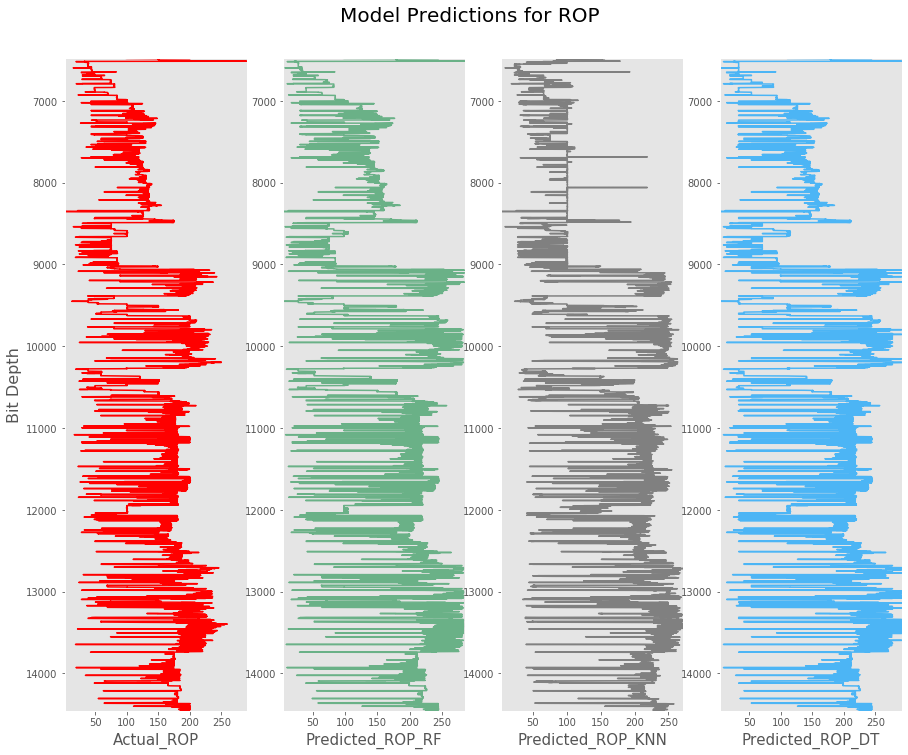

In [50]:
log_plot1(df)

In [51]:
def log_plot1(logs):
    plt.style.use('ggplot')
    from matplotlib.patches import Patch
    logs = logs.sort_values(by='Bit Depth')
    top = logs['Bit Depth'].min()
    bot = logs['Bit Depth'].max()
    
    f, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 14))
    ax[0].plot(logs['Actual_ROP'], logs['Bit Depth'], color='red')
    ax[0].plot(logs['Predicted_ROP_RF'],logs['Bit Depth'], color='#6AB187')
    ax[1].plot(logs['Actual_ROP'], logs['Bit Depth'], color='red')
    ax[1].plot(logs['Predicted_ROP_KNN'], logs['Bit Depth'], color='#808080')
    ax[2].plot(logs['Actual_ROP'], logs['Bit Depth'], color='red')
    ax[2].plot(logs['Predicted_ROP_DT'], logs['Bit Depth'], color='#4CB5F5')
    
    
    
    
    for i in range(len(ax)):
        ax[i].set_ylim(top,bot)
        ax[i].invert_yaxis()
        ax[i].grid()
        
    ax[0].set_xlabel("Actual_ROP", fontsize = 15)
    ax[0].set_xlim(logs['Actual_ROP'].min(), logs['Actual_ROP'].max())
    ax[0].set_ylabel("Bit Depth",fontsize = 16)
    ax[0].set_xlabel("Predicted_ROP_RF", fontsize = 15)
    ax[0].set_xlim(logs['Predicted_ROP_RF'].min(), logs['Predicted_ROP_RF'].max())
    ax[1].set_xlabel("Predicted_ROP_KNN", fontsize = 15)
    ax[1].set_xlim(logs['Predicted_ROP_KNN'].min(), logs['Predicted_ROP_KNN'].max())
    ax[2].set_xlabel("Predicted_ROP_DT", fontsize = 15)
    ax[2].set_xlim(logs['Predicted_ROP_DT'].min(), logs['Predicted_ROP_DT'].max())
    

    
    f.suptitle('Model Predictions for ROP', fontsize=20,y=0.9)

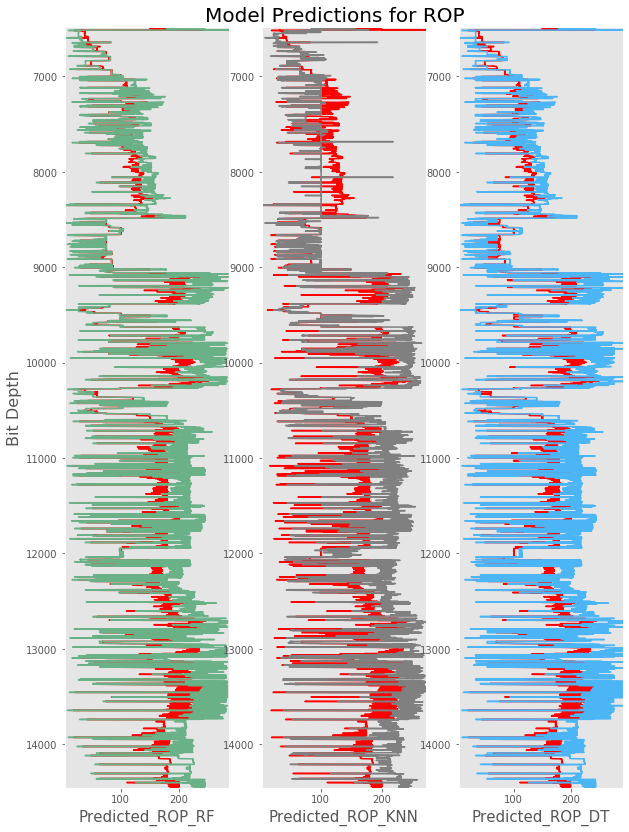

In [52]:
log_plot1(df)

### Stage 7: Conclusion and Recommendation

**Conclusion**
* Both the train-test split and K-ford cross validation techniques performed well in the train and testing stages with accuracy scores >90%
* For the new well, both techniques achieved fairly poor accuracies of >60%

**Recommendation**
* Clustering analysis can be employed to determine good split ratios for validation purposes before predicting for new wells 
* Since both techniques achieved poor accuracies of >60%, then it suggests that our model is not all that good for predicting new wells, and hence requires more data for training